# Stellar Binaries

## Authors
B.W. Holwerda

## Learning Goals
* Learn about Eclipsing Binaries
* Light curve analysis
* FFT analysis of a light curve
* relative depth analysis for size comparison
* Deriving the Kepler's 3rd law from Newtonian orbit of two stars

## Keywords


## Companion Content

Chapter 13.5 in Ryden & Peterson

Chapter 7 in Carroll & Ostlie

## Summary
Inspired by the paper by Lo and Fu 2022 J. Phys.: Conf. Ser. 2381 012106 (https://iopscience.iop.org/article/10.1088/1742-6596/2381/1/012106), we use lightcurve to extract an eclipsing binary and infer all we can learn from this binary.

<hr>



## Student Name and ID:



## Date:

<hr>

In [190]:
# Importing the packages we need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15

from astropy.coordinates import SkyCoord
import lightkurve as lk
import astropy.units as u
from astropy.timeseries import BoxLeastSquares


### TIC 7720507 Lightcurve

First we will use lightkurve to search for data obtained by the Transiting Exoplanet Survey Satellite (TESS) to see when it has observed our target binary.

Below shows an eclipsing binary star system made up of an A0v primary and G5v secondary in a circular orbit about each other that we view almost edge-on. The orbital plane is tilted with respect to the line of sight by 6°. The top half of the frame shows the appearance of the two stars, with the red dot marking the center of mass of the system (just outside the radius of the blueish A0v primary star). The light curve of the total system is traced out in the lower panel as they orbit, with a red marker used on the light curve to show the current location.

Notice that the deepest eclipse occurs when the secondary star is in front of the primary. This is because of the nearly factor of two greater effective temperature of the primary (10,000K compared to 5,500K). More light is blocked when the secondary is blocking part of the primary, than when the primary completely blocks the secondary.

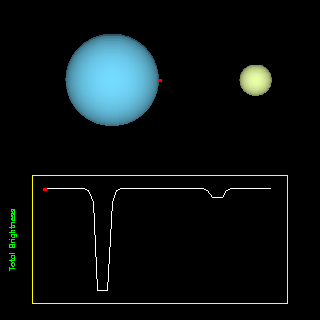

from: https://www.astronomy.ohio-state.edu/pogge.1/Ast162/Movies/eclbin.html

TIC 7720507 is also a binary but with a different set of stars than this example. It does have a primary and secondary star. 
We will use the TESS light curve to learn everything there is to learn from a lightcurve of an occulting binary.
First we get all the TESS data available. 

In [193]:
result = lk.search_lightcurve('TIC 7720507', mission='TESS')

In [195]:
result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 25,2020,SPOC,120,7720507,0.0
1,TESS Sector 26,2020,SPOC,120,7720507,0.0
2,TESS Sector 40,2021,SPOC,120,7720507,0.0
3,TESS Sector 26,2020,TESS-SPOC,1800,7720507,0.0
4,TESS Sector 25,2020,TESS-SPOC,1800,7720507,0.0
5,TESS Sector 41,2021,TESS-SPOC,600,7720507,0.0
6,TESS Sector 40,2021,TESS-SPOC,600,7720507,0.0
7,TESS Sector 54,2022,TESS-SPOC,600,7720507,0.0
8,TESS Sector 53,2022,TESS-SPOC,600,7720507,0.0


As we can see there are plenty of observations of this target with different exposure times and in different sectors of the TESS survey. 
We are going to grab the 20th period and stich it all together. 

In [198]:
lc = result[3].download_all().stitch()

Let's see what kind of information is in this lc lightcurve data-structure. 

In [201]:
print(lc.info)

<TessLightCurve length=1136>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32              {:14.7e} MaskedQuantity     0
       flux_err float32              {:14.7e} MaskedQuantity     0
       timecorr float32            d {:14.7e}       Quantity     0
      cadenceno   int32                {:10d}         Column     0
   centroid_col float64          pix {:10.5f} MaskedQuantity     0
   centroid_row float64          pix {:10.5f} MaskedQuantity     0
       sap_flux float32 electron / s {:14.7e} MaskedQuantity     0
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity     0
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity     0
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity     0
    pdcsap_flux float32 electron / s {:14.7e} MaskedQuantity     0
pdcsap_flux_err float32 electron 

### Exercise 1

As you can see many different things are saved but the ones we are interested in are the time and flux. 
The time is in a special class. So when you ask for the values for 'time' column, make sure to ask for the value alone (add .value to do that). Plot the flux as a function of time. Time is in days since start of mission.

In [1]:
# student work here


### Exercise 2

Let's evaluate the data we have here first. Is there a gap in the data or a strange discontinuity? How could that affect the measurement of the period?

*student answer here*

### Exercise 3

Identify a range of time where there do not seem to be artifacts in the data. Plot this range only (use xlim) and make a np.where selection called "cleancurve" to identify this range. NOTE: there can be no gap in the lightcurve whatsoever! If the curve is broken by even a single point, make sure to exclude that range. 

In [3]:
# student work here




### Exercise 4

Identify a range of time where there do not seem to be artifacts in the data. Plot this range only (use xlim) and make a np.where selection to identify this range. NOTE: there can be no gap in the lightcurve whatsoever! If the curve is broken by even a single point, make sure to exclude that range. Over which range do you plan to extract the power spectrum?

*student selected dates:*

### Exercise 5

Exaining the section of the lightcurve that you have, what are the *period* (P) and the *transit time* ($t_{trans}$) of the binary? Make a visual estimate. We will need both numbers later. 

*student answer here*

*student answer here*

### Exercise 6

Make a visual estimate of the *depth* of each transit. Visually estimate a baseline and the depth of the secondary transiting in front of the primary (deepest) and the one where the primary obscures the secondary (shallowest transit). Note both numbers below. We will need them later.  

Like the original paper, we will use the BoxLeastSquares algorithm to find the period. Use the cleancurve variable to define your time range.

In [5]:
cleancurve = ok # this is the range you picked earlier 

model = BoxLeastSquares(lc['time'][ok].value * u.day, lc['flux'][ok].value, dy=0.01) #lc['flux_err'][ok].value)
periodogram = model.autopower(0.11, objective="snr")


NameError: name 'ok' is not defined

### Exercise 7

Plot the periodogram's period and power (periodogram.period and periodogram.power respectvely). Label which is which. 

In [7]:
# student work here


### Exercise 8

Reading off your periodogram, which period in days is the strongest peak? How does it compare to your initial visual esimate?

*student answer here*

### Exercise 9

You can use numpy's argmax function to find the index of an array where the maximum occurs. Use argmax to identify the index where peak power occurs. Use that index to find which period *exactly* this occurs at.

In [9]:
# student work here


# From lightcurve to stellar measurements

From a star’s light curve, we can also determine its relative size. The fractional depth of a transit
indicates the relative size of a star for its orbiting object in terms of radius (Teske et al. (2020)), 
expressed below, where $R_*$ is the radius of the star, and $R_p$ is the radius of the orbiting object.

$$ \delta = \left({R_* \over R_p }\right)^2 \ \ \ \ \ (1)$$

The orbiting object can be a planet or the smaller of the two stars in a binary.

Kepler’s third law states that the square of a star’s period is directly proportional to the cubic semi-
major axis of its orbit, shown below:

$$ P^2 = {4 \pi^2 \over G M} \times a^3  \ \ \ \ \ (2)$$

$P$ is the period in seconds, $G$ is the gravitational constant
with a value of $G=6.67\times10^{-11} \ m^3 \ kg^{-1} \ s^{-2}$, and $a$ is the semi-major axis in meters.

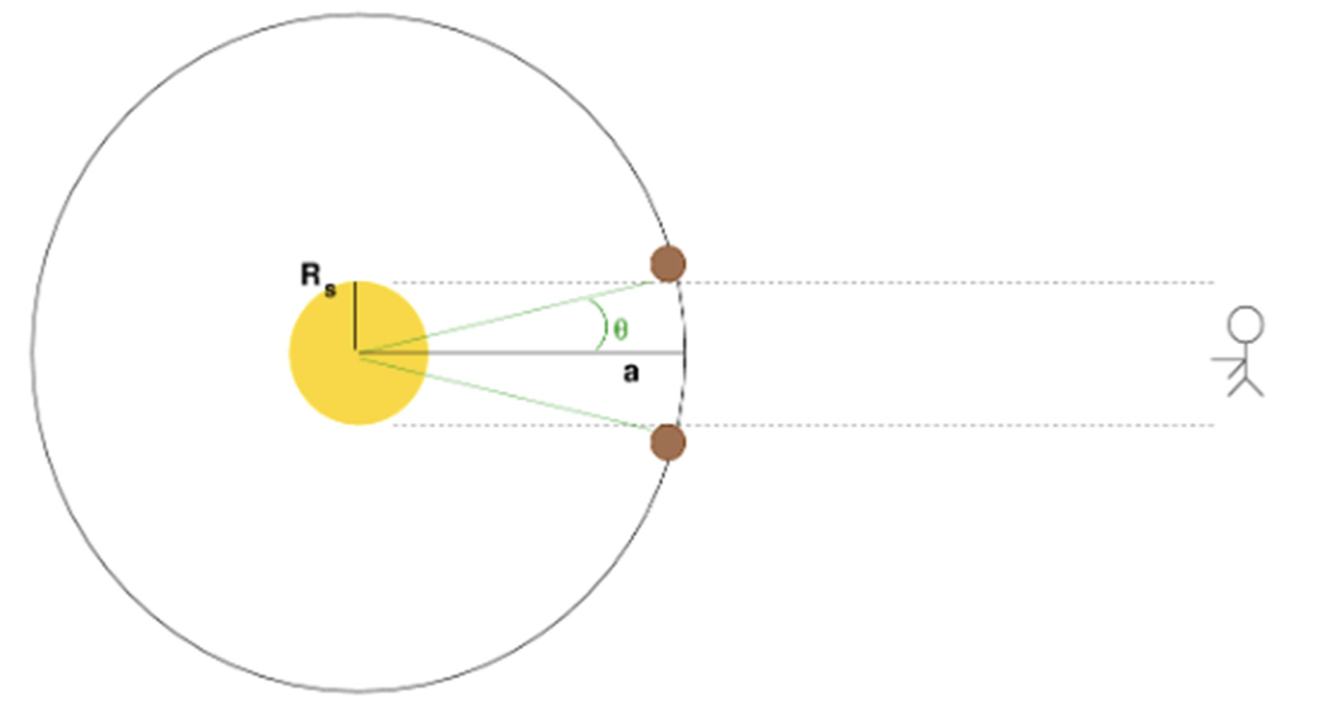

Illustrated by the figure above, $tan(\theta)$ is equal to the ratio of the radius of the star, $R_*$ to the value of the orbit’s
semi-major axis ($a$). Since $\theta$ is a small value, we can approximate that as $tan(\theta) \simeq \theta$.

$$ \theta \approx {R_* \over a} = {t \over P}  \ \ \ \ \ (3)$$

Where t is the transit time of an eclipse and P the period of the binary. The angle is proportional to the time the companion spends in front of the star (transit time) as a fraction of the period.

We remember the mass of the star can be expressed as: $M_* = {4 \over 3} \pi R_*^3 \rho_*$

We can now convert the mass of the star in equation (2) into:

$$ P^2 = {4 \pi^2 \over 4/3 \pi G \rho_*} \left( {a^3 \over R_*^3}\right) = {4 \pi^2 \over 4/3 \pi G \rho_*} \left( {P^3 \over \pi^3t_{trans}^3} \right)  \ \ \ \ \ (4)$$

reworking this into:

$$ \rho_* = {3 P \over G \pi^2 t_{trans}^3}  \ \ \ \ \ (5)$$

so if we can determine the period of the binary and the transit time, we can measure the density of the primary star!


### Exercise 10

Using your estimates of the transit time and the best value you have for the period, estimate the density of the primary star.
Which variables do you need to convert first?

In [11]:
#student work here


### Exercise 11

TIC 7720507 is a main sequence star with a yellow-white color and a radius of 
$R_* = 0.80 R_\odot$ (solar radii). $R_\odot = 695700 \ km$. The Sun's density is $\rho_\odot = 1395.49 \ kg/m^2$. Calculate the mass of the primary star *in solar masses*. HINT: fist express all the variables you need in kg and meters, computer the mass in kg and then compare to the mass of the Sun ($2 \times 10^{30}$ kg).

In [13]:
# student work here


<hr>